<a href="https://colab.research.google.com/github/Hulkilla/Python_practices/blob/main/Programacion_Orientada_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apuntes

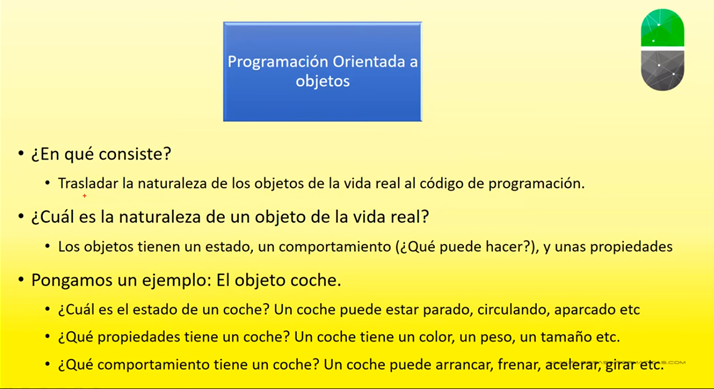

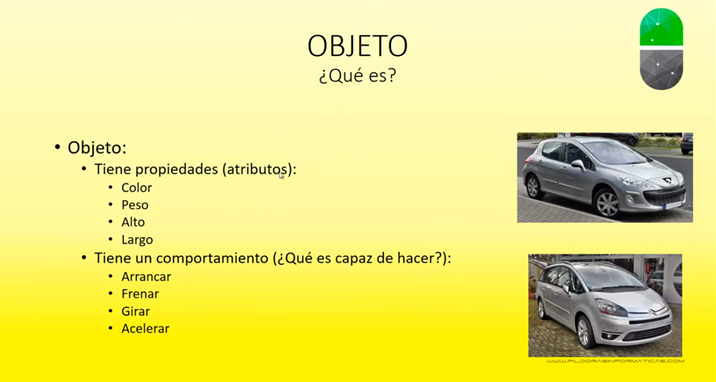


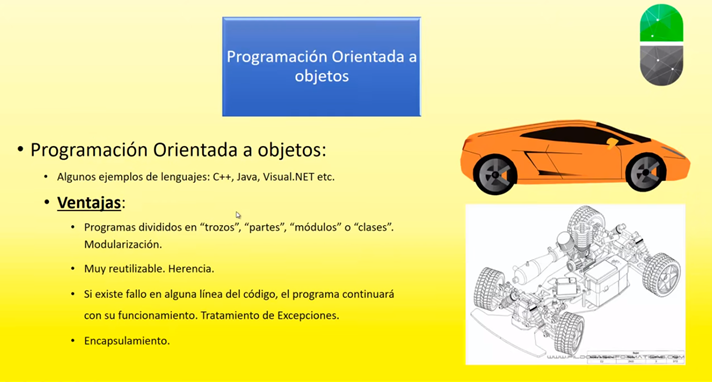



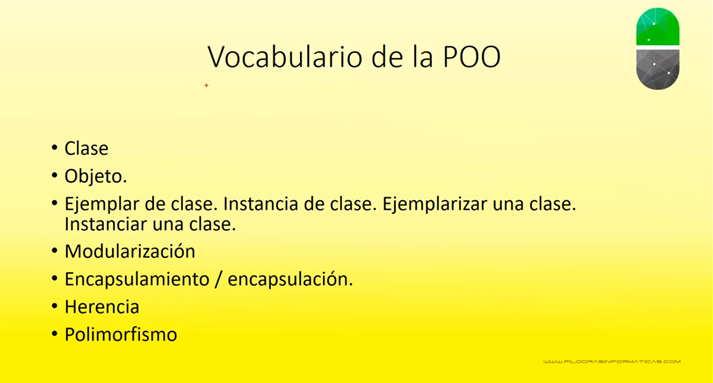

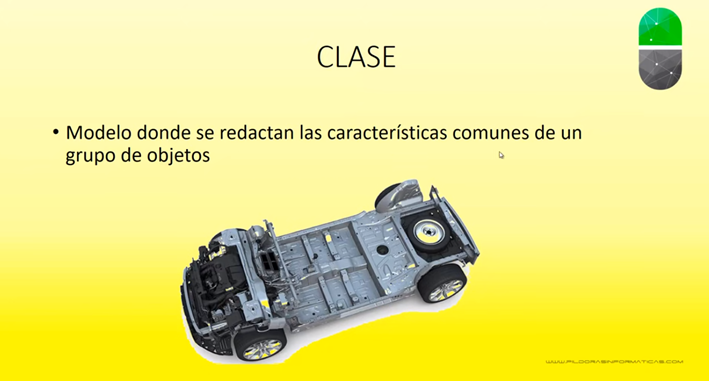

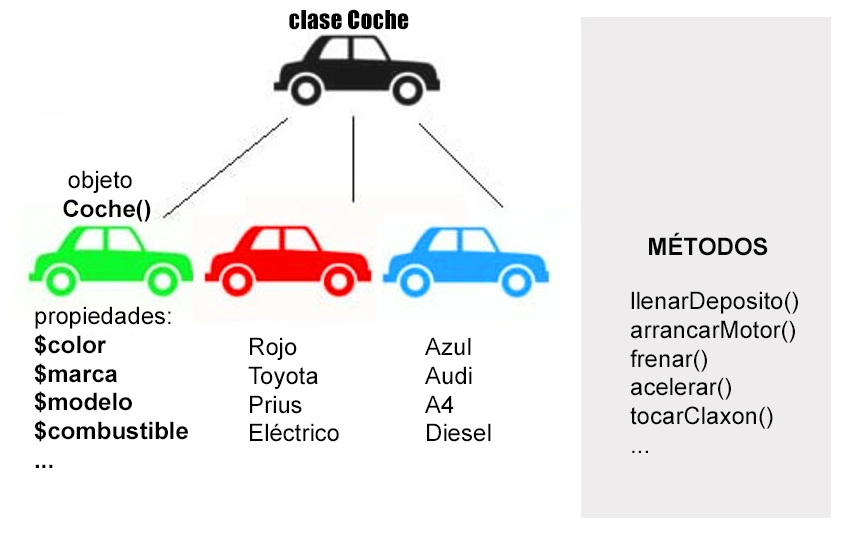

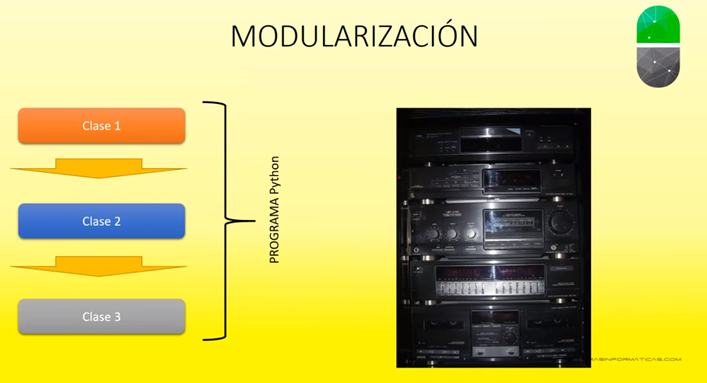

# Ejemplo




In [66]:
class Coche():
  # Para que sean den un estado inicial a los futuros objetos que se creen a partir de la clase (molde del objeto) hace falta un constructor que agrupe dichas propiedades
  def __init__(self): # El constructor siempre se llama como __init__ Esto viene de "estado inicial"
  # Propiedades. Ahora mismo hay 4 propiedades. No te olvides de meter el self. dentro del estado inicial
  # Con los 2 guiones bajos, encapsulamos la variable y no puede cambiarse desde fuera de la clase, pero sí dentro de la clase
    self.__largoChasis = 250
    self.__anchoChasis = 120
    self.__ruedas = 4
    self.__enmarcha = False
    #Estado inicial de las caracteristicas comunes de los futuros objetos que se creen. En este caso, el estado inicial de todos los coches (objeto) van a estar parados


  # Métodos/Comportamientos. Tiene 2
  def arrancar(self, arrancamos): #Self es el objeto instanciado

    self.__enmarcha = arrancamos

    if(self.__enmarcha): #Si no se pone nada se sobreentiende que es "True"
      #Aqui comprobamos si todos los parametros del chequeo va bien justo antes de arrancar.
      #No se debería poder llamar a este método si el coche está parado. Por lo que esté método debería estar encapsulado para que no se llame este método a lo tonto.
      chequeo = self.__chequeo_interno() # método encapsulado <-- ojo, si está encapsulado hay que poner los 2 guiones. NO olvidar!!!!


    if(self.__enmarcha and chequeo): #Si va todo bien, el coche arranca
      return "El coche está en marcha"
    elif(self.__enmarcha and chequeo == False):
      return "Algo ha ido mal en el chequeo. No se puede arrancar"
    else:
      return "El coche está parado"


  def estadoCoche(self):
    print("El coche tiene", self.__ruedas, "ruedas. Un ancho de", self.__anchoChasis, "cm y un largo de", self.__largoChasis, "cm")

  # Chequeo del coche antes de arrancar

  def __chequeo_interno(self): # Método encapsulado
    print("Realizando chequeo interno")

    #Los siguientes parámetros deberían pedirse por consola, pero por no complicar se está cambiando a mano
    self.gasolina = "ok"
    self.aceite = "mal"
    self.puertas = "cerradas"

    if(self.gasolina =="ok" and self.aceite == "ok" and self.puertas =="cerradas"):
      return True
    else:
      return False

In [68]:
print("-----------Primer objeto--------")
miCoche = Coche() #Instanciar una clase --> Hemos creado un objeto
print(miCoche.arrancar(True))
print(miCoche.estadoCoche())


-----------Primer objeto--------
Realizando chequeo interno
Algo ha ido mal en el chequeo. No se puede arrancar
El coche tiene 4 ruedas. Un ancho de 120 cm y un largo de 250 cm
None


In [69]:
print("----------Segundo objeto--------")
miCoche2=Coche()

miCoche2.ruedas = 2 #Esto no se debería permitir hacer porque los coches tienen 4 ruedas. Para evitar esto, se hace la encapsulación.
                    #De esta manera, la propiedad rueda (entre otras) no se cambiará por mucho que nosotros queramos

print(miCoche2.arrancar(False))
print(miCoche2.estadoCoche())

----------Segundo objeto--------
El coche está parado
El coche tiene 4 ruedas. Un ancho de 120 cm y un largo de 250 cm
None


# Herencia

In [84]:
#Superclase
class Vehiculos():

  def __init__(self, marca, modelo):

    self.marca = marca
    self.modelo = modelo
    self.enmarcha = False
    self.acelera = False
    self.frena = False

  def arrancar(self):

    self.enmarcha = True

  def acelerar(self):
    self.acelera = True

  def frenar(self):
    self.frena = True

  def estado(self):
    print(""" Marca:""", self.marca, """
 Modelo:""", self.modelo, """
 En marcha:""", self.enmarcha, """
 Acelerando:""", self.acelera, """
 Frenando:""", self.frena)

In [111]:
#Subclase de Vehículos: Furgoneta

class Furgoneta(Vehiculos):

  def carga(self, cargar):
    self.cargado = cargar
    if(self.cargado): #Recuerda, si no pone nada es igual a True
      return "La furgoneta está cargada"
    else:
      return "La furgoneta no está cargada"


In [108]:
# Subclase de Vehículos: Moto
class Moto(Vehiculos):
  def __init__(self, marca, modelo, cilindrada):
    super().__init__(marca, modelo) #Esto viene de la superclase anterior. Por eso se pone el super().__init__
    self.cilindrada = cilindrada #Y esto es propio de la moto, por lo que va unicamente con el self.

  Hcaballito=""
  def caballito(self):
    self.Hcaballito="Haciendo el caballito"

  def estado(self): #Como tenemos nuevas cosas en el estado, este se sobreescribe al método general de la superclase Vehíchulos
    print(""" Marca:""", self.marca, """
 Modelo:""", self.modelo, """
 Cilindrada:""", self.cilindrada, """
 En marcha:""", self.enmarcha, """
 Acelerando:""", self.acelera, """
 Frenando:""", self.frena, """
""",self.Hcaballito)



In [109]:
#Testeo de la subclase Moto:

miMoto = Moto("Honda", "CBR", "600") #Por herencia, hereda todo

miMoto.caballito()
miMoto.estado()

 Marca: Honda 
 Modelo: CBR 
 Cilindrada: 600 
 En marcha: False 
 Acelerando: False 
 Frenando: False 
 Haciendo el caballito


In [115]:
# Testeo de la subclase Furgoneta

miFurgoneta = Furgoneta("Renault", "Kangoo")
miFurgoneta.arrancar()
miFurgoneta.estado()
print(miFurgoneta.carga(True))

# El metodo carga sólo está en la Furgoneta, por lo que si lo intentas hacer en la moto, pues te da error

Marca: Renault 
Modelo: Kangoo 
En marcha: True 
Acelerando: False 
Frenando: False
La furgoneta está cargada


In [116]:
# Clase nueva: Vehículos eléctricos

class VElectricos():
  def __int__(self):
    self.autonomia = 100

  def cargarEnergia(self):
    self.cargando = True


In [125]:
# Subclase de vehículos y vehículos electricos: Bicicleta eléctrica
# Herencia multiple

class BicicletaElectrica(VElectricos, Vehiculos):
  pass


In [127]:
miBici = BicicletaElectrica("Orbea", "HC1030")
#Si VElectricos tuviera un argumento, este enmascararía los argumentos de Vehículos
# En este caso se peuden poner los argumentos de "Marca y "Modelo" de la clase Vehículos porque la clase VElectricos no tiene nada.